In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-05-21 to 2019-07-10 - 114


In [6]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

114


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
VMBS,30,0.240181,0.233245,0.859604,1.688865,0.264901
MBB,30,0.242017,0.238641,0.847865,1.722590,0.325100
IEF,30,0.447487,0.612045,0.666298,3.238060,0.797894
TLH,30,0.603354,0.863395,0.652855,4.267298,1.152945
SPTL,30,0.778861,1.197341,0.617350,5.404191,1.633820
VGLT,30,0.782275,1.224929,0.606233,5.411750,1.662625
TLT,30,0.788616,1.256146,0.596215,5.440666,1.773344
SCHR,30,0.314201,0.467510,0.587193,2.304105,0.618182
VGIT,30,0.314766,0.470999,0.584043,2.324642,0.651614


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted MBB 0.894 -0.377
evicted USMV 0.872 -0.485
evicted TDTT 0.510 -0.309
retry backlogs ['FEX', 'JKE', 'FTC', 'ADX', 'LRGF', 'SCHD', 'VONV', 'ONEQ', 'RPG', 'DGRW', 'QDF', 'DHS', 'SDY', 'SCHK', 'PWV', 'SCHV', 'IWB', 'IYY', 'VONG', 'VONE', 'VTI', 'FTCS', 'MGV', 'SPLG', 'DLN', 'DSI', 'VV', 'VTV', 'DGRO', 'VYM', 'HDV', 'SPHQ', 'FV', 'JHML', 'VIG', 'FVD', 'SPTM', 'RSP', 'SUSA', 'IWV', 'SCHB', 'FTA', 'SPYD', 'PRF', 'IUSV', 'RDIV', 'QUAL', 'VOOG', 'VOO', 'IVW', 'VMBS', 'IPE', 'IWD', 'SCHO', 'DIA', 'SPY', 'SPHD', 'SPYG', 'IUSG', 'SCHX', 'DTN', 'IEF', 'OEF', 'SPTL', 'TLH', 'MGC', 'ITOT', 'TLT', 'SCHR', 'VGSH', 'IEI', 'SPTS', 'IWF', 'SHY', 'IVV', 'IWY', 'GOVT', 'VTIP', 'STIP', 'VUG', 'VOOV', 'SCHP', 'VGLT', 'IVE', 'VGIT', 'CFO', 'FNDX', 'TIP', 'MOAT', 'SCHG', 'GSLC', 'SPLV', 'JKD', 'NOBL', 'FPX', 'FDL', 'MGK', 'XLG', 'MTUM', 'PKW', 'SDOG', 'TILT', 'RPV', 'CET', 'SPYV', 'RWL', 'DVY', 'USA'] at 0.905/-0.51 - 1.448
evicted SCHP 0.889 -0.504
evicted SPLV 0.796 -0.368
retry backlogs ['JKE', 'FEX'

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,0.989742,0.666108,-0.499266,0.563448,1.060081,1.376978,2.614669,1.426284,5.967992,1.332001
EDV,30.0,1.011416,1.682265,-2.141637,0.041183,0.606873,1.552189,5.231127,0.577634,6.989691,2.610604
QQQ,30.0,1.131636,2.588095,-4.512806,-0.552443,1.112908,2.907064,7.659307,0.421914,6.135261,6.440085
VLUE,30.0,0.918496,2.165776,-3.985411,0.355647,1.397851,1.917667,4.888826,0.405773,3.569430,6.135276


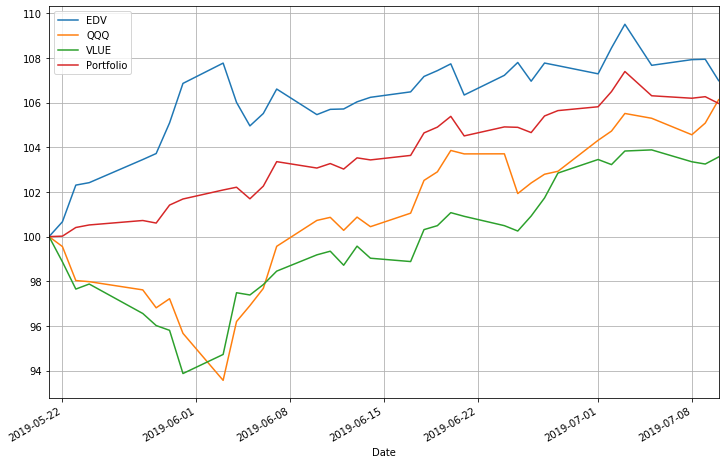

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1)
quote.setup_mask({'EDV', 'QQQ', 'VLUE'})
sd.update(quote.optimize_portfolio(.1))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(.1))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

{'EDV': 0.557, 'MTUM': 0.443}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,1.070318,0.880685,-0.837440,0.554423,1.207597,1.634794,2.892617,1.170266,7.088937,1.406949
EDV,30.0,1.011416,1.682265,-2.141637,0.041183,0.606873,1.552189,5.231127,0.577634,6.989691,2.610604
MTUM,30.0,1.175244,2.049958,-2.116999,-0.152733,1.261660,2.235094,6.048635,0.553944,7.213722,2.638699


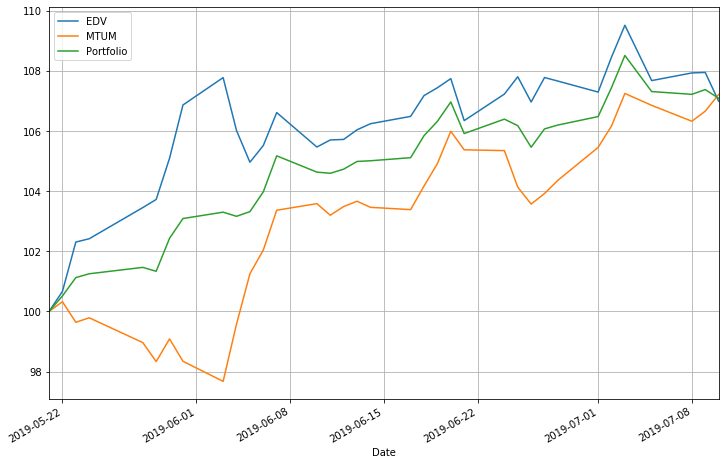

In [5]:
quote2 = Quote(['EDV', 'MTUM'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)